# House Prices: Advanced Regression Techniques

In [1]:
# Importando bibliotecas

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from scipy import stats
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import make_scorer, r2_score
import sklearn.linear_model as linear_model
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

# Iniciando análise 

# 1.Coleta dos dados

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
## concat train and test
df = pd.concat((df_train, df_test))
temp_df = df
print("Shape of df: ", df.shape)

Shape of df:  (2919, 81)


In [5]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0


In [6]:
df.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1449,2910,180,RM,21.0,1470,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,NaN
1450,2911,160,RM,21.0,1484,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,NaN
1451,2912,20,RL,80.0,13384,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,NaN
1452,2913,160,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml,NaN
1453,2914,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,NaN
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Checando variáveis numéricas e categóricas

In [8]:
## Verificando número de variáveis numéricas

variaveis_numericas = df.select_dtypes(include = [np.number])
print("O número de variáveis numéricas é: {}".format(variaveis_numericas.shape[1]))

O número de variáveis numéricas é: 38


In [9]:
variaveis_numericas.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [10]:
## Verificando número de variáveis categóricas

variaveis_categoricas = df.select_dtypes(exclude = [np.number])
print("O número de variáveis categoricas é: {}".format(variaveis_categoricas.shape[1]))

O número de variáveis categoricas é: 43


In [11]:
variaveis_categoricas.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [12]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

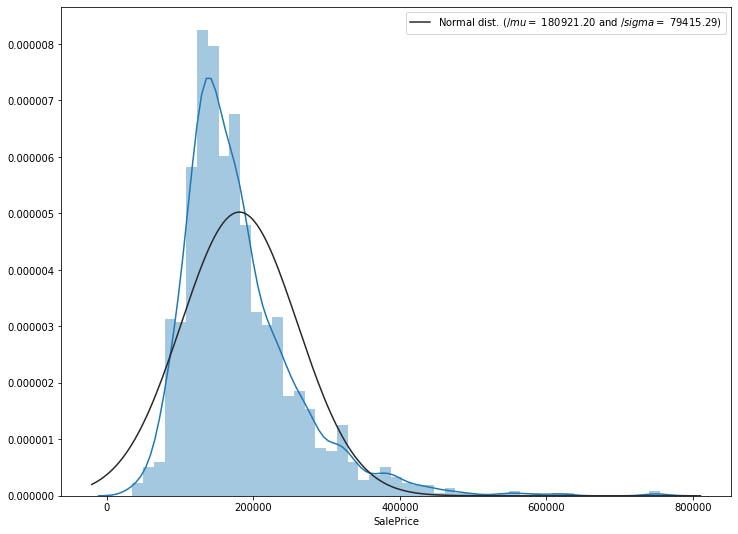

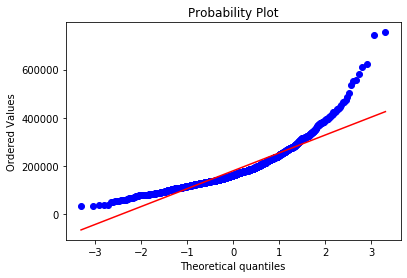

In [13]:
## Checando distribuição dos dados no dataset de treinamento

plt.subplots(figsize=(12,9))
sns.distplot(df_train['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(df_train['SalePrice'])

# Plot with the distribution
plt.legend(['Normal dist. ($/mu=$ {:.2f} and $/sigma=$ {:.2f})'.format(mu, sigma)], loc='best')

# Probability plot
fig=plt.figure()
stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

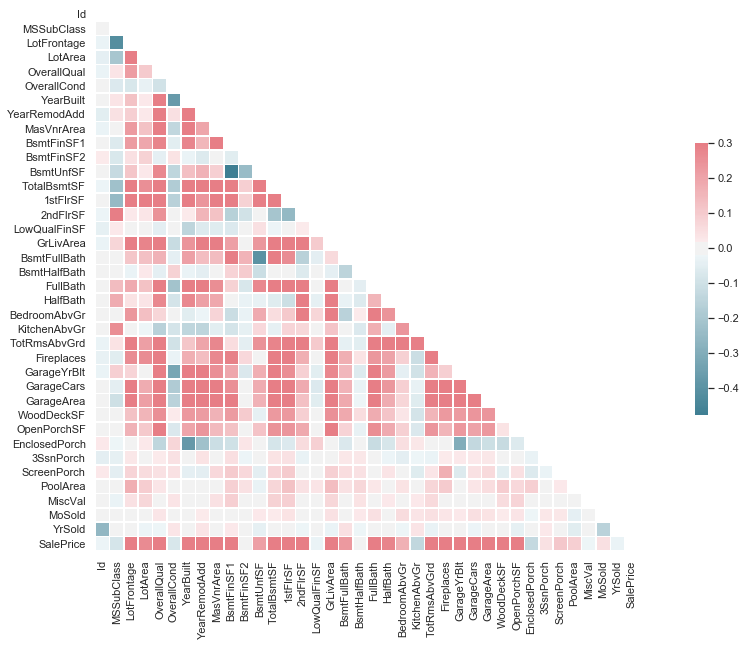

In [14]:
corr = variaveis_numericas.corr()

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

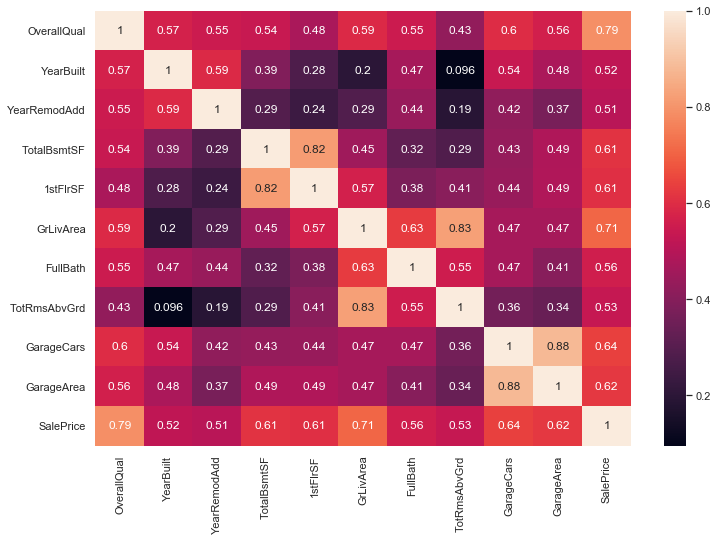

In [15]:
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12,8))
top_corr = df_train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

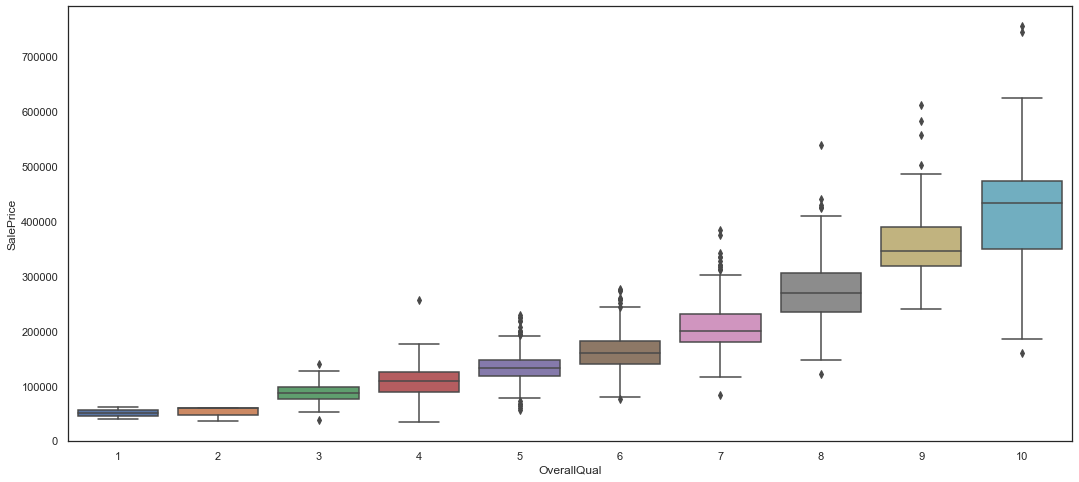

In [16]:
plt.figure(figsize=(18,8))
sns.boxplot(x=df_train.OverallQual, y=df_train.SalePrice)

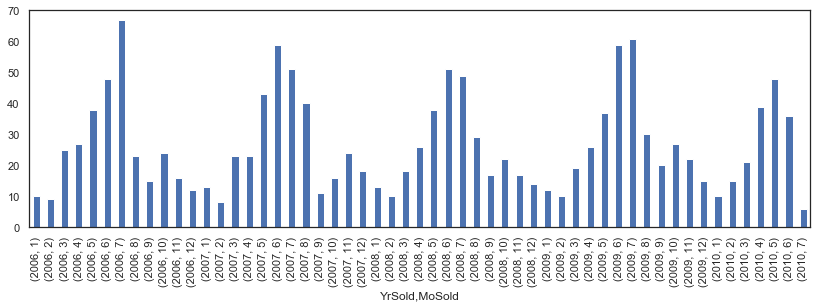

In [17]:
# Vendas de acordo com a data

df_train.groupby(['YrSold', 'MoSold']).Id.count().plot(kind='bar', figsize=(14,4))
plt.show()

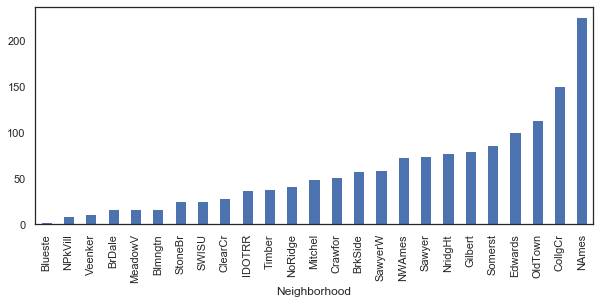

In [18]:
#Localização das propriedades

df_train.groupby('Neighborhood').Id.count().sort_values().plot(kind='bar',figsize=(10,4))
plt.show()

# Tratando dados

In [19]:
df.drop('SalePrice', inplace=True, axis=1)

In [20]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [21]:
# Convertendo variáveis numérica para categóricas (Exercem papel de variáveis categóricas)

df['MSSubClass'] = df.MSSubClass.apply(lambda x: str(x))
df['MoSold'] = df.MoSold.apply(lambda x: str(x))
df['YrSold'] = df.YrSold.apply(lambda x: str(x))

In [22]:
variaveis_categoricas.columns
variaveis_categoricas.head(30)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


In [23]:
# Checando colunas com valores nulos
all_null_values = (df.isnull().sum() / len(df)) * 100
all_null_values = round(all_null_values.drop(all_null_values[all_null_values == 0].index).sort_values(ascending=False)[:30],2)
missing_data = pd.DataFrame({'Percente of null values' :all_null_values})
missing_data.head(25)

,Percente of null values
PoolQC,99.66
MiscFeature,96.40
Alley,93.22
Fence,80.44
FireplaceQu,48.65
LotFrontage,16.65
GarageFinish,5.45
GarageYrBlt,5.45
GarageQual,5.45
GarageCond,5.45


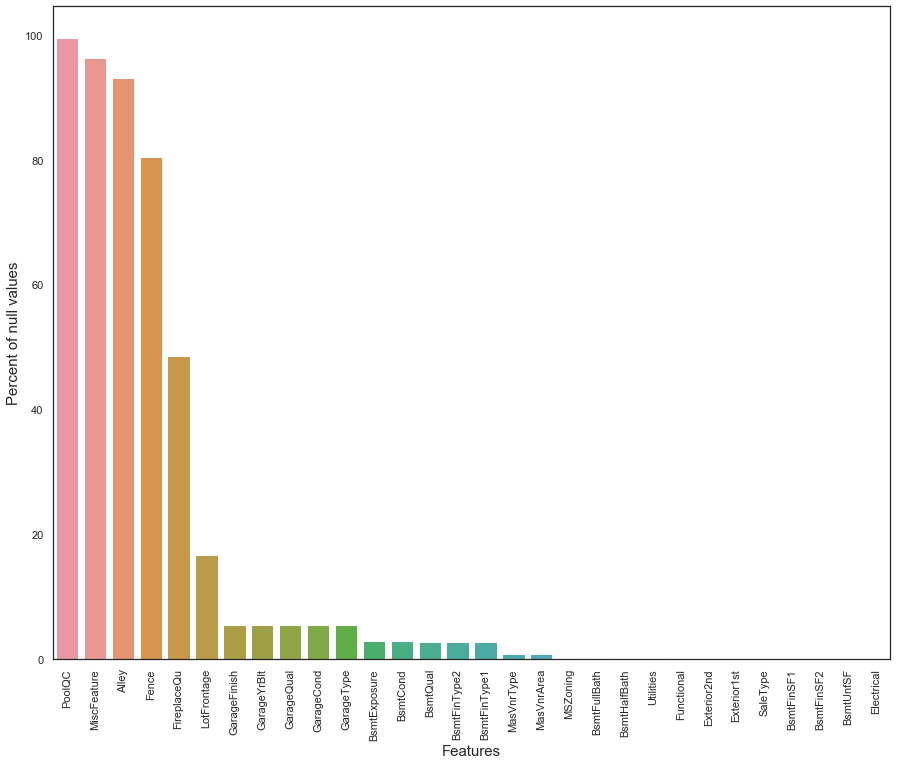

In [24]:
### Verificando porcentagem de valores nulos

f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_null_values.index, y=all_null_values)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of null values', fontsize=15)
#plt.title('Percent null values by feature(Train)', fontsize=15)
plt.show()

In [25]:
# Transformando variáveis categóricas para numéricas (somente variáveis que envolvem qualidade do imóvel)

# Alley
df.Alley.replace({'Grvl':1, 'Pave':2},inplace=True)

# LotShape
df.LotShape.replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4},inplace=True)

# Land Countour
df.LandContour.replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lv1':4}, inplace=True)

# Utilities
df.Utilities.replace({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}, inplace=True)

#Land Slope
df.LandSlope.replace({'Sev':1, 'Mod':2, 'Gt1':3}, inplace=True)

# Exterior Quality
df.ExterQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Exterior Condition
df.ExterCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Quality
df.BsmtQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Condition
df.BsmtCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Exposure
df.BsmtExposure.replace({'No':1, 'Mn': 2, 'Av':3, 'Gd':4}, inplace=True)

# Finished Basement 1 Rating
df.BsmtFinType1.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Finished Basement 2 Rating
df.BsmtFinType2.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Heating Quality and Condition
df.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Kitchen Quality
df.KitchenQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Home functionality
df.Functional.replace({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Mini':7, 'Typ':8}, inplace=True)

# Fireplace Quality
df.FireplaceQu.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Finish
df.GarageFinish.replace({'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)

# Garage Quality
df.GarageQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Cond
df.GarageCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Paved Driveway
df.PavedDrive.replace({'N':1, 'P':2, 'Y':3}, inplace=True)

# Pool Quality
df.PoolQC.replace({'Fa':2, 'TA':3,'Gd':4, 'Ex':5}, inplace=True)

In [26]:
# Preencher valores nulos com zeros (somente variáveis que envolvem qualidade do imóvel)

cat_to_num_features = ['Alley',
                       'LotShape',
                       'LandContour', 
                       'Utilities',
                       'LandSlope', 
                       'ExterQual', 
                       'ExterCond', 
                       'BsmtQual', 
                       'BsmtCond', 
                       'BsmtExposure',
                       'BsmtFinType1', 
                       'BsmtFinType2', 
                       'HeatingQC', 
                       'KitchenQual', 
                       'Functional', 
                       'FireplaceQu',
                       'GarageFinish', 
                       'GarageQual',
                       'GarageCond', 
                       'PavedDrive', 
                       'PoolQC']


df[cat_to_num_features] = df[cat_to_num_features].fillna(0) 

In [27]:
## Análise de variância - ANOVA (somente conjunto de treino)
## Variáveis categóricas restantes

cat_features = variaveis_categoricas.columns
df_train[cat_features] = df_train[cat_features].fillna('Missing')
df[cat_features] = df[cat_features].fillna('Missing')

# Onward...
anova = {'feature':[], 'f':[], 'p':[]}
for cat in cat_features:
  group_prices = []
  for group in df_train[cat].unique():
      group_prices.append(df_train[df_train[cat] == group]['SalePrice'].values)
  f, p = stats.f_oneway(*group_prices)
  anova['feature'].append(cat)
  anova['f'].append(f)
  anova['p'].append(p)
anova = pd.DataFrame(anova)
anova = anova[['feature','f','p']]
anova.sort_values('p', inplace = True)

### Null hypothesis (H0): Não faz diferença no preço de venda 
### Se P<0.05 podemos rejeitar H0
### H1: As variáveis categóricas influenciam de forma significante no preço de venda



In [28]:
anova

,feature,f,p
8,Neighborhood,71.784865,1.558600e-225
18,ExterQual,443.334831,1.439551e-204
21,BsmtQual,316.148635,8.158548e-196
30,KitchenQual,407.806352,3.032213e-192
34,GarageFinish,213.867028,6.228747e-115
32,FireplaceQu,121.075121,2.971217e-107
20,Foundation,100.253851,5.791895e-91
33,GarageType,80.379992,6.117026e-87
24,BsmtFinType1,64.688200,2.386358e-71
27,HeatingQC,88.394462,2.667062e-67


In [29]:
### P é menor que 0.05 em todas as variáveis exceto:
### "Street, LandSlope e Utilities"
### Logo as variáveis Street, LandSlope e Utilities não fazem diferença no preço do imóvel
### H0(null hypothesis)

In [30]:
df.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,0.0,1,Lvl,4.0,...,0,0,0.0,Missing,Missing,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,0.0,1,Lvl,4.0,...,0,0,0.0,Missing,Missing,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,0.0,2,Lvl,4.0,...,0,0,0.0,Missing,Missing,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,0.0,2,Lvl,4.0,...,0,0,0.0,Missing,Missing,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,0.0,2,Lvl,4.0,...,0,0,0.0,Missing,Missing,0,12,2008,WD,Normal
5,6,50,RL,85.0,14115,Pave,0.0,2,Lvl,4.0,...,0,0,0.0,MnPrv,Shed,700,10,2009,WD,Normal
6,7,20,RL,75.0,10084,Pave,0.0,1,Lvl,4.0,...,0,0,0.0,Missing,Missing,0,8,2007,WD,Normal
7,8,60,RL,NaN,10382,Pave,0.0,2,Lvl,4.0,...,0,0,0.0,Missing,Shed,350,11,2009,WD,Normal
8,9,50,RM,51.0,6120,Pave,0.0,1,Lvl,4.0,...,0,0,0.0,Missing,Missing,0,4,2008,WD,Abnorml
9,10,190,RL,50.0,7420,Pave,0.0,1,Lvl,4.0,...,0,0,0.0,Missing,Missing,0,1,2008,WD,Normal


In [31]:
missing_values = (df[cat_features] == 'Missing').sum().sort_values(ascending=False)
missing_values[missing_values > 0]

df.loc[df.Electrical == 'Missing', 'Electrical'] = df.Electrical.mode()[0]

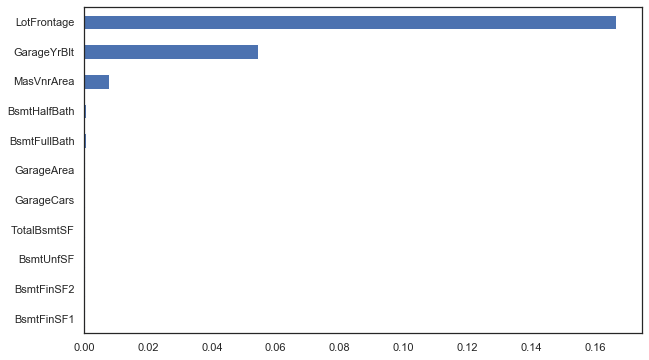

In [32]:
missing_data = df.isnull().sum() / df.shape[0]
missing_data[missing_data > 0].sort_values(ascending=True).plot(kind='barh', figsize=(10,6))
#plt.title('Percentage of missing values')
plt.show()

In [33]:
df.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,0.0,1,Lvl,4.0,...,0,0,0.0,Missing,Missing,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,0.0,1,Lvl,4.0,...,0,0,0.0,Missing,Missing,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,0.0,2,Lvl,4.0,...,0,0,0.0,Missing,Missing,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,0.0,2,Lvl,4.0,...,0,0,0.0,Missing,Missing,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,0.0,2,Lvl,4.0,...,0,0,0.0,Missing,Missing,0,12,2008,WD,Normal
5,6,50,RL,85.0,14115,Pave,0.0,2,Lvl,4.0,...,0,0,0.0,MnPrv,Shed,700,10,2009,WD,Normal
6,7,20,RL,75.0,10084,Pave,0.0,1,Lvl,4.0,...,0,0,0.0,Missing,Missing,0,8,2007,WD,Normal
7,8,60,RL,NaN,10382,Pave,0.0,2,Lvl,4.0,...,0,0,0.0,Missing,Shed,350,11,2009,WD,Normal
8,9,50,RM,51.0,6120,Pave,0.0,1,Lvl,4.0,...,0,0,0.0,Missing,Missing,0,4,2008,WD,Abnorml
9,10,190,RL,50.0,7420,Pave,0.0,1,Lvl,4.0,...,0,0,0.0,Missing,Missing,0,1,2008,WD,Normal


In [34]:
# Numérica

df.LotFrontage = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df.GarageYrBlt.fillna(0, inplace=True)
df.MasVnrArea.fillna(0, inplace=True)

for vnr_type in df.MasVnrType.unique():
    # so here we set area equal to the mean of the given veneer type
    df.loc[(df.MasVnrType == vnr_type) & (df.MasVnrArea == 0), 'MasVnrArea'] = df[df.MasVnrType == vnr_type].MasVnrArea.mean()

In [35]:
# Let's closely look into the MasVnrType field here

# First let's correct our assignment
df.MasVnrType.replace({'Missing':'None'}, inplace=True)

# Second, we are going to replace them with the mean value
df.loc[(df.MasVnrType == 'None') & (df.MasVnrArea > 1), 'MasVnrType'] = 'BrkFace' # Most common
df.loc[(df.MasVnrType == 'None') & (df.MasVnrArea == 1), 'MasVnrType'] = 0  # M1 sq ft is basically 0

for vnr_type in df.MasVnrType.unique():
    # so here we set area equal to the mean of the given veneer type
    df.loc[(df.MasVnrType == vnr_type) & (df.MasVnrArea == 0), 'MasVnrArea'] = df[df.MasVnrType == vnr_type].MasVnrArea.mean()

In [36]:
# Verificando IDs duplicados
print('Train set duplicate IDs: {}'.format(df.duplicated('Id').sum()))

Train set duplicate IDs: 0


In [37]:
missing_data = round(df.isnull().sum() / df.shape[0], 2)
missing_data.head(50)

Id              0.0
MSSubClass      0.0
MSZoning        0.0
LotFrontage     0.0
LotArea         0.0
Street          0.0
Alley           0.0
LotShape        0.0
LandContour     0.0
Utilities       0.0
LotConfig       0.0
LandSlope       0.0
Neighborhood    0.0
Condition1      0.0
Condition2      0.0
BldgType        0.0
HouseStyle      0.0
OverallQual     0.0
OverallCond     0.0
YearBuilt       0.0
YearRemodAdd    0.0
RoofStyle       0.0
RoofMatl        0.0
Exterior1st     0.0
Exterior2nd     0.0
MasVnrType      0.0
MasVnrArea      0.0
ExterQual       0.0
ExterCond       0.0
Foundation      0.0
BsmtQual        0.0
BsmtCond        0.0
BsmtExposure    0.0
BsmtFinType1    0.0
BsmtFinSF1      0.0
BsmtFinType2    0.0
BsmtFinSF2      0.0
BsmtUnfSF       0.0
TotalBsmtSF     0.0
Heating         0.0
HeatingQC       0.0
CentralAir      0.0
Electrical      0.0
1stFlrSF        0.0
2ndFlrSF        0.0
LowQualFinSF    0.0
GrLivArea       0.0
BsmtFullBath    0.0
BsmtHalfBath    0.0
FullBath        0.0


In [38]:
# # Check for outliers

# plt.figure(figsize=(10,5))
# sns.regplot(df.GrLivArea, df.SalePrice, scatter_kws={'alpha':0.3})
# plt.show()

In [39]:
df.shape

(2919, 80)

In [40]:
# Outliers

#df.drop(df[df.GrLivArea >= 4000].index, inplace=True)
df.BsmtFinSF1.fillna(df.BsmtFinSF1.mode(), inplace=True)
df.BsmtFinSF2.fillna(df.BsmtFinSF2.mode(), inplace=True)
df.BsmtUnfSF.fillna(df.BsmtUnfSF.mode(), inplace=True)

In [41]:
# Calculating total square feet (area)
df.TotalBsmtSF.fillna(0, inplace=True)
df.GarageArea.fillna(df.GarageArea.mean(), inplace=True)
df.BsmtHalfBath.fillna(df.BsmtHalfBath.mean(), inplace=True)
df.BsmtFullBath.fillna(df.BsmtFullBath.mean(), inplace=True)
df.GarageCars.fillna(df.GarageCars.mode(), inplace=True)


df['Total_SF'] = df.TotalBsmtSF + df.GrLivArea
df['TotalFloorSF'] = df['1stFlrSF'] + df['2ndFlrSF']
df['TotalPorchSF'] = df.OpenPorchSF + df.EnclosedPorch + df['3SsnPorch'] + df['ScreenPorch']

In [42]:
# Now let's create some boolean features (Yes-No type)

df['HasBasement'] = df.TotalBsmtSF.apply(lambda x: 1 if x>0 else 0)
df['HasGarage'] = df.GarageArea.apply(lambda x: 1 if x>0 else 0)
df['HasPorch'] = df.TotalPorchSF.apply(lambda x: 1 if x>0 else 0)
df['HasPool'] = df.PoolArea.apply(lambda x: 1 if x>0 else 0)
df['WasRemodeled'] = (df.YearRemodAdd != df.YearBuilt).astype(np.int64)
df['IsNew'] = (df.YearBuilt > 2000).astype(np.int64)
df['WasCompleted'] = (df.SaleCondition != 'Partial').astype(np.int64)


In [43]:
boolean_features = ['HasBasement','HasGarage','HasPorch','HasPool','WasRemodeled','IsNew','WasCompleted']

In [44]:
numeric_data = df.select_dtypes(include = [np.number])

# Finding categorical feratures
categorical_data = df.select_dtypes(exclude = [np.number])


# Let's print how many numerical and categorical features do we have
print('There are {0} numerical and {1} categorical features in the data'.format(numeric_data.shape[1], categorical_data.shape[1]))

num_features = numeric_data.columns
cat_features = categorical_data.columns

There are 62 numerical and 28 categorical features in the data


In [45]:
num_features = [f for f in num_features if f not in boolean_features]

In [46]:
# Total Bathrooms

df['TotalBathrooms'] = df.FullBath + 0.5*df.HalfBath + df.BsmtFullBath + 0.5*df.BsmtHalfBath

In [47]:
## Finding numerical features
numeric_data = df.select_dtypes(include = [np.number])

# Finding categorical feratures
categorical_data = df.select_dtypes(exclude = [np.number])

# Let's print how many numerical and categorical features do we have
print('There are {0} numerical and {1} categorical features in the data'.format(numeric_data.shape[1], categorical_data.shape[1]))

num_features = numeric_data.columns
cat_features = categorical_data.columns
num_features = [f for f in num_features if f not in boolean_features]

There are 63 numerical and 28 categorical features in the data


In [48]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,TotalFloorSF,TotalPorchSF,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted,TotalBathrooms
0,1,60,RL,65.0,8450,Pave,0.0,1,Lvl,4.0,...,1710,61,1,1,1,0,0,1,1,3.5
1,2,20,RL,80.0,9600,Pave,0.0,1,Lvl,4.0,...,1262,0,1,1,0,0,0,0,1,2.5
2,3,60,RL,68.0,11250,Pave,0.0,2,Lvl,4.0,...,1786,42,1,1,1,0,1,1,1,3.5
3,4,70,RL,60.0,9550,Pave,0.0,2,Lvl,4.0,...,1717,307,1,1,1,0,1,0,1,2.0
4,5,60,RL,84.0,14260,Pave,0.0,2,Lvl,4.0,...,2198,84,1,1,1,0,0,0,1,3.5
5,6,50,RL,85.0,14115,Pave,0.0,2,Lvl,4.0,...,1362,350,1,1,1,0,1,0,1,2.5
6,7,20,RL,75.0,10084,Pave,0.0,1,Lvl,4.0,...,1694,57,1,1,1,0,1,1,1,3.0
7,8,60,RL,80.0,10382,Pave,0.0,2,Lvl,4.0,...,2090,432,1,1,1,0,0,0,1,3.5
8,9,50,RM,51.0,6120,Pave,0.0,1,Lvl,4.0,...,1774,205,1,1,1,0,1,0,1,2.0
9,10,190,RL,50.0,7420,Pave,0.0,1,Lvl,4.0,...,1077,4,1,1,1,0,1,0,1,2.0


In [49]:
features = num_features

for f in features:
  df.loc[:,f] = np.log1p(df[f])

In [50]:
SalePrice = np.log1p(df_train['SalePrice'])

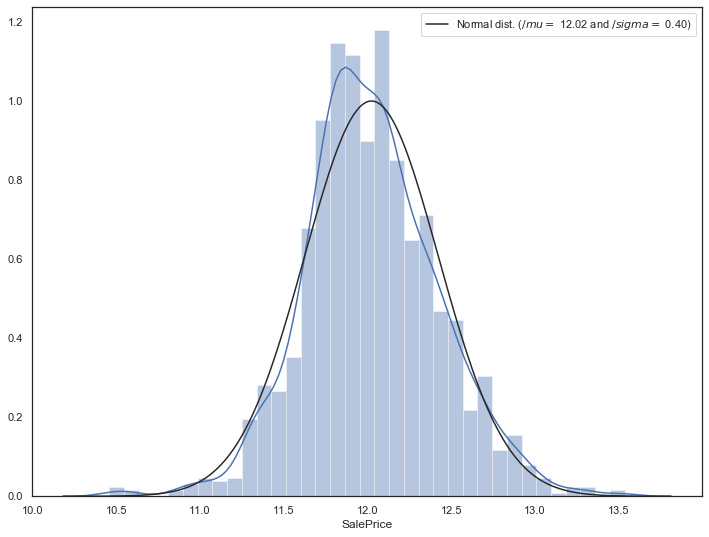

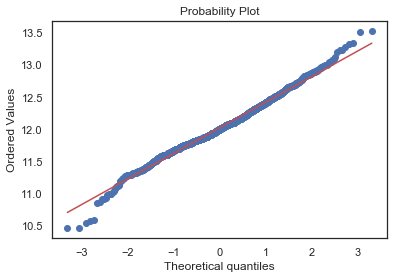

In [51]:
## Checando distribuição dos dados no dataset de treinamento

plt.subplots(figsize=(12,9))
sns.distplot(SalePrice, fit=stats.norm)

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(SalePrice)

# Plot with the distribution
plt.legend(['Normal dist. ($/mu=$ {:.2f} and $/sigma=$ {:.2f})'.format(mu, sigma)], loc='best')

# Probability plot
fig=plt.figure()
stats.probplot(SalePrice, plot=plt)
plt.show()

In [52]:
# Get dummies one-hot encoding method
df = pd.get_dummies(df).copy()

In [53]:
# scaling dataset with robust scaler

scaler = RobustScaler()
scaler.fit(df)
df = scaler.transform(df)

In [54]:
train_len = len(df_train)
y_train = SalePrice
x_train = df[:train_len]
x_test = df[train_len:]

print(x_train.shape)
print(x_test.shape)
print(len(y_train))

(1460, 283)
(1459, 283)
1460


In [55]:
def test_model(model, x_train=x_train, y_train=y_train):
    cv = KFold(n_splits = 3, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, x_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

In [56]:
def rsme(model, x, y):
  cv_scores = -cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=10)
  return np.sqrt(cv_scores)

In [57]:
LR = linear_model.LinearRegression()
test_model(LR)

[0.8659446926836275]

In [58]:
# Regularização - Lasso

lasso = linear_model.Lasso(alpha=1e-4)
test_model(lasso)

lasso_rsme = rsme(lasso, x_train, y_train)
print('Score: {:.5f}'.format((test_model(lasso)[0])))
print('RSME: {:.5f}'.format(lasso_rsme.mean()))

Score: 0.88094
RSME: 0.12817


In [59]:
# Support Vector Regressor

svr_reg = SVR(kernel='rbf')
test_model(svr_reg)

svr_rsme = rsme(svr_reg, x_train, y_train)
print('Score: {:.5f}'.format((test_model(svr_reg)[0])))
print('RSME: {:.5f}'.format(svr_rsme.mean()))

Score: 0.83034
RSME: 0.15548


In [60]:
#Decision Tree
dt_reg = DecisionTreeRegressor(random_state=21)
test_model(dt_reg)

dt_rsme = rsme(dt_reg, x_train, y_train)
print('Score: {:.5f}'.format((test_model(dt_reg)[0])))
print('RSME: {:.5f}'.format(dt_rsme.mean()))

Score: 0.73679
RSME: 0.19411


In [61]:
# Random Forest
rf_reg = RandomForestRegressor(n_estimators = 1000, random_state=51)
test_model(rf_reg)

rf_rsme = rsme(rf_reg, x_train, y_train)
print('Score: {:.5f}'.format((test_model(rf_reg)[0])))
print('RSME: {:.5f}'.format(rf_rsme.mean()))

Score: 0.86755
RSME: 0.13978


In [62]:
# Bagging Regressor
br_reg = BaggingRegressor(n_estimators=1000, random_state=51)
test_model(br_reg)

br_rsme = rsme(br_reg, x_train, y_train)
print('Score: {:.5f}'.format((test_model(br_reg)[0])))
print('RSME: {:.5f}'.format(br_rsme.mean()))

Score: 0.86747
RSME: 0.13962


In [63]:
# Gradient Boosting Regressor
gbr_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, loss='ls', random_state=51)
test_model(gbr_reg)

gbr_rsme = rsme(gbr_reg, x_train, y_train)
print('Score: {:.5f}'.format((test_model(gbr_reg)[0])))
print('RSME: {:.5f}'.format(gbr_rsme.mean()))

Score: 0.88962
RSME: 0.11970


In [64]:
# XGBoost

xgb2_reg = xgb.XGBRegressor(colsample_bytree=0.2, 
                        gamma=0.0,
                        learning_rate=0.05,
                        max_depth=6,
                        min_child_weight=1.5,
                        n_estimators=7200,
                        reg_alpha=0.9,
                        reg_lambda=0.6,
                        subsample=0.2,
                        seed=42,
                        silent=1)
test_model(xgb2_reg)

xgb2_rsme = rsme(xgb2_reg, x_train, y_train)
print('Score: {:.5f}'.format((test_model(xgb2_reg)[0])))
print('RSME: {:.5f}'.format(xgb2_rsme.mean()))

[20:57:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:57:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:57:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu